# Import Library

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import re

# Import Data

In [5]:
df = pd.read_csv("C:/Users/mprat/OneDrive/Desktop/spam.csv", encoding='iso-8859-1')

In [14]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [15]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [16]:
df.tail(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [13]:
df.tail(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...,NaN,NaN,NaN
5563,ham,Ard 6 like dat lor.,NaN,NaN,NaN
5564,ham,Why don't you wait 'til at least wednesday to ...,NaN,NaN,NaN
5565,ham,Huh y lei...,NaN,NaN,NaN
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


# Explore data

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [18]:
df.shape

(5572, 5)

In [19]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [20]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [21]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [22]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [23]:
df.duplicated().sum()

403

In [24]:
df.drop_duplicates()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [25]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [26]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

rename the columns v1 and v2 by label and text

In [27]:
df.columns = ['category', 'text']

In [28]:
df.head()

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df['category']=encoder.fit_transform(df['category'])
df['category']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: category, Length: 5572, dtype: int32

In [30]:
df.head()

,category,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
x=df['category']
print(x)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: category, Length: 5572, dtype: int32


In [32]:
y=df['text']
print(y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object


# Data visualization

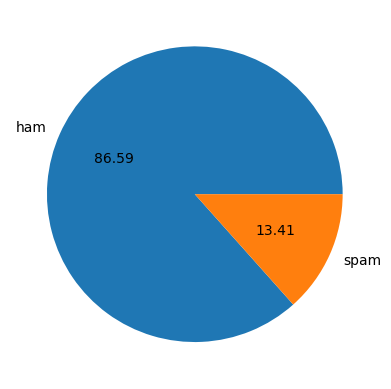

In [33]:
plt.pie(df['category'].value_counts(), labels= ['ham','spam'], autopct = '%0.2f')
plt.show()

<Axes: xlabel='category', ylabel='count'>

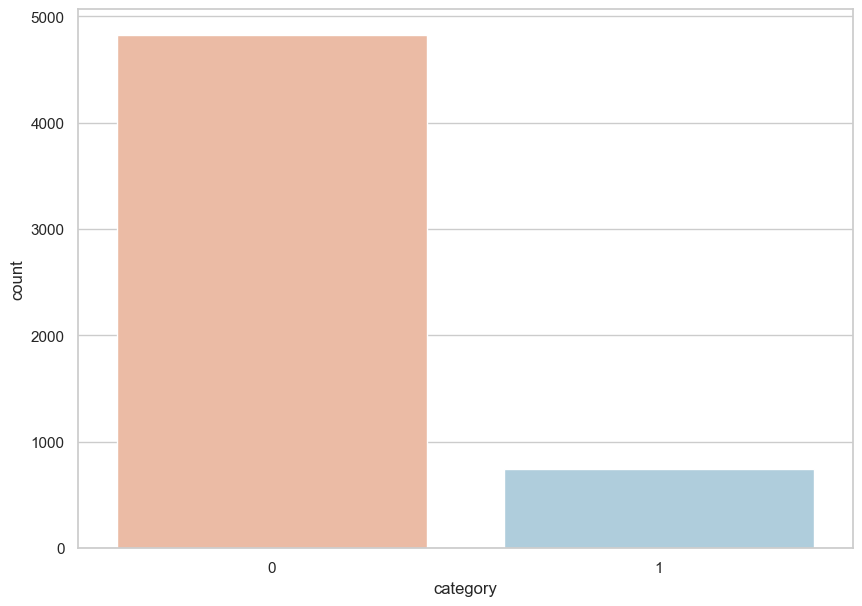

In [34]:
sns.set(rc={'figure.figsize':(10,7)})
sns.set_style('whitegrid')
sns.countplot(x='category' ,data=df,palette='RdBu')

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
label_encoder = LabelEncoder()
df['category'] = label_encoder.fit_transform(df['category'])

# spliting data

In [37]:
x = df['text']
y = df['category']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state= 50, test_size = .2)

In [51]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True) 
x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [40]:
print(x.shape)

(5572,)


In [41]:
print(x_train.shape)

(4457,)


In [42]:
print(x_test.shape)

(1115,)


In [43]:
x_train,x_test

(2322                              Should I be stalking u?
 4811       fyi I'm at usf now, swing by the room whenever
 951                              Shb b ok lor... Thanx...
 230     Get down in gandhipuram and walk to cross cut ...
 572                                Can you open the door?
                               ...                        
 3330            How much it will cost approx . Per month.
 70         Wah lucky man... Then can save money... Hee...
 132                             First answer my question.
 2014    Ambrith..madurai..met u in arun dha marrge..re...
 1931                  What pa tell me.. I went to bath:-)
 Name: text, Length: 4457, dtype: object,
 3409    Joy's father is John. Then John is the ____ of...
 2103    Its a site to simulate the test. It just gives...
 2665                       R u meeting da ge at nite tmr?
 3239    A cute thought for friendship: \Its not necess...
 1205    The whole car appreciated the last two! Dad an...
              

In [44]:
y_train,y_test

(2322    0
 4811    0
 951     0
 230     0
 572     0
        ..
 3330    0
 70      0
 132     0
 2014    0
 1931    0
 Name: category, Length: 4457, dtype: int32,
 3409    0
 2103    0
 2665    0
 3239    0
 1205    0
        ..
 5020    0
 2141    0
 1265    0
 4094    0
 1839    0
 Name: category, Length: 1115, dtype: int32)

# Model Training

In [45]:
lo=LogisticRegression()
lo.fit(x_train_features, y_train)

LogisticRegression()

In [46]:
prediction = lo.predict(x_train_features)
accuracy = accuracy_score(y_train, prediction)
accuracy

0.96881310298407

In [47]:
prediction = lo.predict(x_test_features)
accuracy = accuracy_score(y_test, prediction)
accuracy

0.9551569506726457

In [54]:
demo_email = ['buy one get two movie tickets']

features = feature_extraction.transform(demo_email)

prediction = lo.predict(features)
print(prediction)

if (prediction[0]==1):
    print("this is a ham email")
else:
    print("this is spam email")

[0]
this is spam email
